In [1]:
from dataretrieval import nwis
import geopandas as gpd
from pathlib import Path

/tmp/ipykernel_16153/765574608.py:2: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [2]:
fn = Path('../../data-cumberland/Cumberland Boundary/Cumberland Boundary.shp')
gdf = gpd.read_file(fn)

gdf.bounds.values[0]

array([-88.39666667,  35.31416667, -82.71666667,  37.53916667])

In [3]:
startDt = '2010-01-01'
endDt = '2023-02-01'

# siteListPhos = nwis.what_sites(stateCd="CO", parameterCd="00665")
siteListPhos = nwis.what_sites(bBox=list(gdf.bounds.values[0].round(4)), startDt=startDt, endDt=endDt, parameterCd='00060', )

In [4]:
filtered_sites = siteListPhos[0]
filtered_sites.head()

,agency_cd,site_no,station_nm,site_tp_cd,dec_lat_va,dec_long_va,coord_acy_cd,dec_coord_datum_cd,alt_va,alt_acy_va,alt_datum_cd,huc_cd
0,USGS,03277300,"NORTH FORK KENTUCKY RIVER AT WHITESBURG, KY",ST,37.117598,-82.824604,F,NAD83,1127.40,0.01,NAVD88,5100201.0
1,USGS,03277500,"NORTH FORK KENTUCKY RIVER AT HAZARD, KY",ST,37.246583,-83.182778,1,NAD83,829.20,0.07,NAVD88,5100201.0
2,USGS,03280700,"CUTSHIN CREEK AT WOOTON, KY",ST,37.165093,-83.307956,F,NAD83,869.29,0.06,NAVD88,5100202.0
3,USGS,03281100,"GOOSE CREEK AT MANCHESTER, KY",ST,37.152034,-83.760197,U,NAD83,818.81,0.01,NAVD88,5100203.0
4,USGS,03281500,"SOUTH FORK KENTUCKY RIVER AT BOONEVILLE, KY",ST,37.479810,-83.675192,F,NAD83,641.91,0.07,NAVD88,5100203.0


In [5]:
filtered_sites = gpd.GeoDataFrame(filtered_sites, geometry=gpd.points_from_xy(filtered_sites['dec_long_va'], filtered_sites['dec_lat_va']), crs='epsg:4326')
sites_within_basin = filtered_sites[filtered_sites.within(gdf.geometry[0])]

In [6]:
Path('../../data-cumberland/usgs_gage_locations').mkdir(exist_ok=True)
sites_within_basin.to_csv(Path('../../data-cumberland/usgs_gage_locations/usgs_gages.csv'), index=False)

<GeoAxesSubplot:>

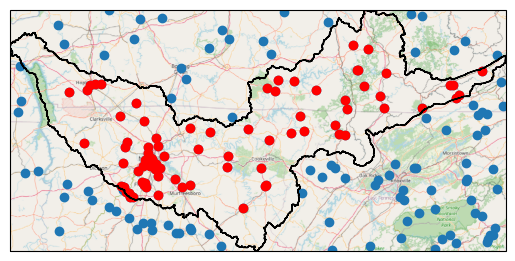

In [7]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import warnings
warnings.filterwarnings('ignore')

f, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()})

request = cimgt.OSM()
extent = gdf.bounds[['minx', 'maxx', 'miny', 'maxy']].values[0]
ax.set_extent(extent)
ax.add_image(request, 8)

filtered_sites.plot(ax=ax)
sites_within_basin.plot(ax=ax, color='red')
gdf.plot(ax=ax, fc='none', label='Gunnison basin boundary')

# Download the data of filtered sites

In [8]:
sites_within_basin.head()

,agency_cd,site_no,station_nm,site_tp_cd,dec_lat_va,dec_long_va,coord_acy_cd,dec_coord_datum_cd,alt_va,alt_acy_va,alt_datum_cd,huc_cd,geometry
24,USGS,03400500,"POOR FORK AT CUMBERLAND, KY",ST,36.973981,-82.992940,F,NAD83,1409.72,0.01,NAVD88,5130103.0,POINT (-82.99294 36.97398)
25,USGS,03400785,"MARTINS FORK ABOVE SMITH, KY",ST,36.726198,-83.287958,U,NAD83,1351.19,0.14,NAVD88,NaN,POINT (-83.28796 36.72620)
26,USGS,03400800,"MARTINS FORK NEAR SMITH, KY",ST,36.752310,-83.257401,F,NAD83,1258.47,0.15,NAVD88,5130101.0,POINT (-83.25740 36.75231)
27,USGS,03400986,"MARTIN'S FORK NEAR HARLAN, KY",ST,36.844533,-83.323515,M,NAD83,1099.27,0.16,NAVD88,5130101.0,POINT (-83.32351 36.84453)
28,USGS,03401000,"CUMBERLAND RIVER NEAR HARLAN, KY",ST,36.846755,-83.355739,F,NAD83,1138.58,0.16,NAVD88,5130101.0,POINT (-83.35574 36.84675)


In [9]:
siteINFO = nwis.get_dv(sites=sites_within_basin['site_no'], parameterCd="00060", start=startDt, end=endDt)
siteINFO

(                                    00060_Maximum 00060_Maximum_cd  \
 site_no  datetime                                                    
 03400500 2010-10-01 00:00:00+00:00            NaN              NaN   
          2010-10-02 00:00:00+00:00            NaN              NaN   
          2010-10-03 00:00:00+00:00            NaN              NaN   
          2010-10-04 00:00:00+00:00            NaN              NaN   
          2010-10-05 00:00:00+00:00            NaN              NaN   
 ...                                           ...              ...   
 03438000 2020-06-26 00:00:00+00:00            NaN              NaN   
          2020-06-27 00:00:00+00:00            NaN              NaN   
          2020-06-28 00:00:00+00:00            NaN              NaN   
          2020-06-29 00:00:00+00:00            NaN              NaN   
          2020-06-30 00:00:00+00:00            NaN              NaN   
 
                                     00060_Minimum 00060_Minimum_cd  \
 sit

In [10]:
Path(f"../../data-cumberland/usgs_insitu/").mkdir()
siteINFO[0].groupby('site_no').apply(lambda gp: gp.to_csv(Path(f"../../data-cumberland/usgs_insitu/{gp.index[0][0]}.csv")))

""
